## Task:
* Make a graph to implement Automatic Higher or Lower game.
* Set the number bounds between 0-20.
* The Graph has to keep guessing (max number of gusses is 7)
* If the guess is correct, then it stops. If not, we will keep looping untirl we hit the max num of gusses.
* Each time a number is guessed, the hint node should say higher or lower and the graph should account for this information and guess the next guess accordingly.

* Input - {"player_name":"Student, "guesses":[], "attempts":0, "lower_bound":1, "upper_bound":20}

* Hint: It will need to adjust it's bounds after every guess based on the hint provided by the hint node.


In [85]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [86]:
class AgentState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts:int
    lower_bound:int
    upper_bound:int
    last_guess: int
    answer: int
    final_result: str

In [87]:
def init_node(state:AgentState) -> AgentState:
    state['attempts'] = 0
    state['answer'] = random.randint(state['lower_bound'], state['upper_bound'])
    state['final_result'] = ''
    return state

In [88]:
def guess_node(state:AgentState) -> AgentState:
    
    state['last_guess'] = (state['lower_bound']+state['upper_bound'])//2
    state['guesses'].append(state['last_guess'])
    state['attempts'] += 1
    
    if state['attempts'] >= 7:
        state['final_result'] = state['final_result'] + f"Game Over!  All guesses: {state['guesses']}.  Correct Answer: {state['answer']}.  Remaining attempts: 0.\n"

    elif state['last_guess'] == state['answer']:
        state['final_result'] = state['final_result'] + f"Game won!  Current Guess: {state['last_guess']}.  Correct Answer: {state['answer']}.  Total Attempts: {state['attempts']}.\n"
        
    elif state['last_guess'] > state['answer']:
        state['upper_bound'] = state['last_guess']-1
        state['final_result'] = state['final_result'] + f"Incorrect guess!  Current Guess: {state['last_guess']}.  Hint: Lower.  Remaining attempts: {7-state['attempts']}.\n"

    elif state['last_guess'] < state['answer']:
        state['lower_bound'] = state['last_guess']+1
        state['final_result'] = state['final_result'] + f"Incorrect guess!  Current Guess: {state['last_guess']}.  Hint: Higher.  Remaining attempts: {7-state['attempts']}\n"
    
    return state

In [89]:
def guess_next_node(state: AgentState) -> str:
    if state['last_guess'] == state['answer'] or state['attempts'] >= 7 :
        return "end"
    else:
        return "continue"

In [90]:
graph = StateGraph(AgentState)

graph.add_node("init_node", init_node)
graph.add_node("guess_node", guess_node)

graph.add_edge(START, "init_node")
graph.add_edge("init_node", "guess_node")
graph.add_conditional_edges(
    "guess_node",
    guess_next_node,
    {
      "continue": "guess_node",
      "end": END  
    }
)

app = graph.compile()

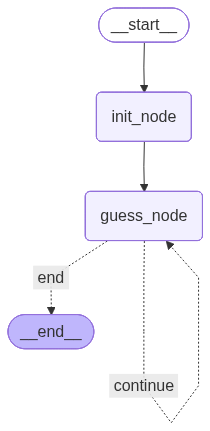

In [91]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [94]:
initial_state: AgentState = {
    "player_name": "Student",
    "guesses": [],
    "attempts": 0,
    "lower_bound": 1,
    "upper_bound": 20,
    "last_guess": -1,
    "answer": -1,
    "final_result": ""
}

result = app.invoke(initial_state)
for r in result['final_result'].split("\n"):
    if "Game won!" in r:
        print("\n")
    print(r)

Incorrect guess!  Current Guess: 10.  Hint: Lower.  Remaining attempts: 6.
Incorrect guess!  Current Guess: 5.  Hint: Higher.  Remaining attempts: 5
Incorrect guess!  Current Guess: 7.  Hint: Lower.  Remaining attempts: 4.


Game won!  Current Guess: 6.  Correct Answer: 6.  Total Attempts: 4.

